In [1]:
pip install pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [3]:
# Create a sample dataset with customer annual income, spending score, and age
data = {'AnnualIncome': [15, 16, 17, 18, 19, 20, 22, 25, 30, 35],
        'SpendingScore': [39, 81, 6, 77, 40, 76, 94, 5, 82, 56],
        'Age': [20, 22, 25, 24, 35, 40, 30, 21, 50, 31]}

df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

   AnnualIncome  SpendingScore  Age
0            15             39   20
1            16             81   22
2            17              6   25
3            18             77   24
4            19             40   35


In [4]:
from sklearn.preprocessing import StandardScaler

# Normalize the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert the scaled data back into a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=['AnnualIncome', 'SpendingScore', 'Age'])
print(df_scaled.head())

   AnnualIncome  SpendingScore       Age
0     -1.086741      -0.546384 -1.074654
1     -0.924540       0.836033 -0.855337
2     -0.762340      -1.632569 -0.526361
3     -0.600140       0.704374 -0.636020
4     -0.437940      -0.513469  0.570225


In [6]:
## k-means clustering 
k= 3 
# Apply K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

# Display the cluster assignments
print(df_scaled.head())


   AnnualIncome  SpendingScore       Age  KMeans_Cluster
0     -1.086741      -0.546384 -1.074654               0
1     -0.924540       0.836033 -0.855337               1
2     -0.762340      -1.632569 -0.526361               0
3     -0.600140       0.704374 -0.636020               1
4     -0.437940      -0.513469  0.570225               1


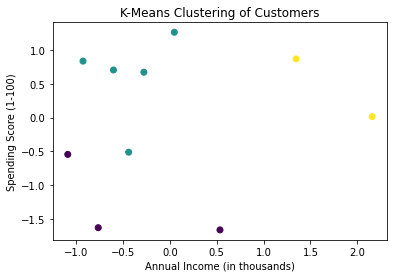

In [7]:
# Visualize the K-Means clusters
plt.scatter(df_scaled['AnnualIncome'], df_scaled['SpendingScore'], c=df_scaled['KMeans_Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Customers')
plt.xlabel('Annual Income (in thousands)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [8]:
# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Convert the PCA result back to a DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
print(df_pca.head())

       PCA1      PCA2
0 -1.821748 -0.340532
1 -0.527497 -1.277689
2 -1.838730  0.708326
3 -0.299792 -0.954219
4 -0.071190  0.113538


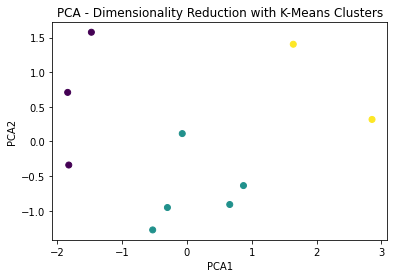

In [10]:
# Visualize the PCA components
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_scaled['KMeans_Cluster'], cmap='viridis')
plt.title('PCA - Dimensionality Reduction with K-Means Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [9]:
from sklearn.manifold import TSNE

# Set perplexity to a value smaller than the number of samples
tsne = TSNE(n_components=2, perplexity=5, random_state=42)

df_tsne = tsne.fit_transform(df_scaled)

# Convert the t-SNE result back to a DataFrame
df_tsne = pd.DataFrame(df_tsne, columns=['t-SNE1', 't-SNE2'])
print(df_tsne.head())

      t-SNE1      t-SNE2
0  39.407581  -79.321419
1  96.371956  -18.225212
2   1.802084 -105.308868
3  55.371342   -9.058578
4  -7.986149    8.997602


C:\Users\Mausami Karogal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Mausami Karogal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


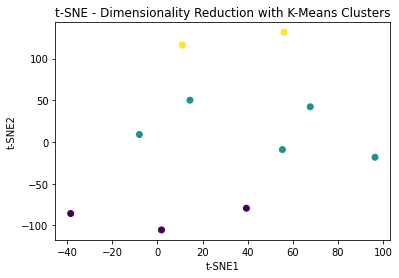

In [11]:
# Visualize the t-SNE components
plt.scatter(df_tsne['t-SNE1'], df_tsne['t-SNE2'], c=df_scaled['KMeans_Cluster'], cmap='viridis')
plt.title('t-SNE - Dimensionality Reduction with K-Means Clusters')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()